# Data analysis

In [1]:
import os
import pygad
import numpy as np
#%matplotlib qt
import matplotlib.pyplot as plt

Test genetic algorithm solution

In [2]:
save_path = os.getcwd() + '/training_data'

In [3]:
def fitness_func(solution, sol_idx):
    return 0
def callback_generation(ga_instance):
    pass
#ga_instance = pygad.load(save_path+"/20220913_143534/pygad_GA")

In [4]:
'''
def evaluate_solution():
    total_reward = 0
    print('Evaluation chromosome:', sol_idx)
    start = time.time()
    time_step = eval_tf_env.reset()
    while not time_step.is_last():
      action_step = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                      data_inputs=time_step.observation,
                                      problem_type="regression")
      time_step = eval_tf_env.step(tf.convert_to_tensor([action_step[0]], dtype=tf.float32))
      total_reward += float(time_step.reward)
    end = time.time()
    print('Control loop timing for 1 timestep [s]:', (end-start)/eval_env_steps_limit)
    
    solution_fitness = total_reward
'''

'\ndef evaluate_solution():\n    total_reward = 0\n    print(\'Evaluation chromosome:\', sol_idx)\n    start = time.time()\n    time_step = eval_tf_env.reset()\n    while not time_step.is_last():\n      action_step = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],\n                                      data_inputs=time_step.observation,\n                                      problem_type="regression")\n      time_step = eval_tf_env.step(tf.convert_to_tensor([action_step[0]], dtype=tf.float32))\n      total_reward += float(time_step.reward)\n    end = time.time()\n    print(\'Control loop timing for 1 timestep [s]:\', (end-start)/eval_env_steps_limit)\n    \n    solution_fitness = total_reward\n'

Compute rewards for best TD3

In [5]:
save_path = os.getcwd() + '/training_data/20230120_214304/states'

104
100


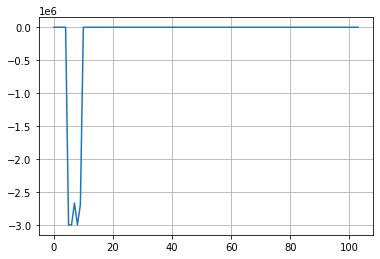

In [6]:
def compute_reward(states):
    tot_rew = 0
    for i in range(len(states)):
        state = states[i]
        reward = max(0, 1 - np.sqrt((state[0]*10)**2 + (state[1]*10)**2 + (state[2]*10)**2))
        reward -= 0.1 * np.sqrt((state[3]-1)**2 + state[4]**2 + state[5]**2 + state[6]**2)
        reward -= 0.1 * np.sqrt(state[10]**2 + state[11]**2 + state[12]**2)
        tot_rew += reward#0.99**i*reward
    return reward

rewards = []
for filename in os.listdir(save_path):
    states = np.load(save_path+'/'+filename)
    rewards.append(compute_reward(states))
print(len(rewards))
print(np.argmax(rewards)) #1663696605.8342047
plt.plot(rewards)
plt.grid()
plt.show()

Plot diagrams

In [7]:
sac_path = os.getcwd() + '/training_data/20230120_130531/avg_rewards.npy'
ddpg_path = os.getcwd() + '/training_data/20230120_153501/avg_rewards.npy'
dqn_path = os.getcwd() + '/training_data/20230120_192149/avg_rewards.npy'
td3_path = os.getcwd() + '/training_data/20230120_214304/avg_rewards.npy'

ddpg = np.load(ddpg_path)
td3 = np.load(td3_path)
dqn = np.load(dqn_path)
sac = np.load(sac_path)

plt.title("Evaluation reward - average of 5 episodes")
plt.xlabel("Training epoch number")
plt.ylabel("Evaluation reward")
plt.xlim([0,3000])
plt.ylim([-2000, 100])
plt.plot(ddpg[:,0], ddpg[:,1], label="DDPG")
plt.plot(td3[:,0], td3[:,1], label="TD3")
plt.plot(dqn[:,0], dqn[:,1], label="DQN")
plt.plot(sac[:,0], sac[:,1], label="SAC")
plt.grid()
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\ELMALI\\Desktop\\etc4-2\\src/training_data/20220914_193928/avg_rewards.npy'

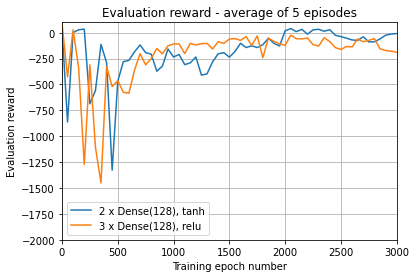

In [8]:
_2_32 = os.getcwd() + '/training_data/20220913_163339/avg_rewards.npy'
_2_64 = os.getcwd() + '/training_data/20220913_204139/avg_rewards.npy'
_2_128 = os.getcwd() + '/training_data/20220914_193928/avg_rewards.npy'
_2_256 = os.getcwd() + '/training_data/20220915_094112/avg_rewards.npy'
_2_512 = os.getcwd() + '/training_data/20220916_214005/avg_rewards.npy'
_3_128_relu = os.getcwd() + '/training_data/20220922_151420/avg_rewards.npy'

_2_32_arr = np.load(_2_32)
_2_64_arr = np.load(_2_64)
_2_128_arr = np.load(_2_128)
_2_256_arr = np.load(_2_256)
_2_512_arr = np.load(_2_512)
_3_128_arr = np.load(_3_128_relu)

plt.title("Evaluation reward - average of 5 episodes")
plt.xlabel("Training epoch number")
plt.ylabel("Evaluation reward")
plt.xlim([0,3000])
plt.ylim([-2000, 100])
plt.plot(_2_128_arr[:,0], _2_128_arr[:,1], label="2 x Dense(128), tanh")
#plt.plot(_2_32_arr[:,0], _2_32_arr[:,1], label="2 x Dense(32), tanh")
#plt.plot(_2_64_arr[:,0], _2_64_arr[:,1], label="2 x Dense(64), tanh")
#plt.plot(_2_256_arr[:,0], _2_256_arr[:,1], label="2 x Dense(256), tanh")
#plt.plot(_2_512_arr[:,0], _2_512_arr[:,1], label="2 x Dense(512), tanh")
plt.plot(_3_128_arr[:,0], _3_128_arr[:,1], label="3 x Dense(128), relu")
plt.grid()
plt.legend()
plt.show()